In [1]:
# NEURAL NETWORK TO CLASSIFY BETWEEN 10 SYMBOLS, [0,1,2,3,4,5,6,7,8,9].
# IT WILL USE CONVOLUTIONAL LAYERS.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import numpy as np


In [ ]:
# loading datasets and importing MNIST (number datasets)
from datasets import load_dataset

dataset = load_dataset("mnist")

In [ ]:
# in most cases we need to normalize images, same size, same channel colors, but in this case the dataset of mnist is already normalized.

In [88]:
# separating the train and test dataset 
x_train, y_train = dataset['train']['image'], dataset['train']['label']
x_test, y_test = dataset['test']['image'], dataset['test']['label']
test_images = x_test

x_train = np.array([np.array(image) for image in x_train])
y_train = np.array([np.array(number) for number in y_train])
x_test = np.array([np.array(image) for image in x_test])
y_test = np.array([np.array(number) for number in y_test])

In [9]:
# saving the image shape to the future neural network architecture building
# more precisely the convolutional layer inputshape
# (28 pixels, 28 pixels, 1) - channel grayscale
image_shape = (x_train[0].shape[0], x_train[0].shape[1], 1)
print(image_shape)

x_test = x_test.reshape(-1, 28,28, 1)

(28, 28, 1)


In [68]:
# NEURAL NETWORK ARCHITECTURE
# Dense, Conv2D, Flatten, MaxPooling2D
filters = [10]
neural_networks = []
losses = []
for filter_q in filters:

  neural_network = Sequential([
      Conv2D(filters=64, kernel_size=(1, 1), activation="relu", input_shape=image_shape),
      MaxPooling2D((1, 1)),
      Conv2D(filters=64, kernel_size=(1, 1), activation="relu"),
      MaxPooling2D((1, 1)),
      Conv2D(filters=filter_q, kernel_size=(1, 1), activation="relu"),
      MaxPooling2D((1, 1)),
      Flatten(),
      Dense(units=64, activation="relu"),
      Dense(units=10, activation="softmax"),
  ])

  neural_network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history = neural_network.fit(x_train, y_train, epochs=5, batch_size=32)
  neural_networks.append(neural_network)

  # Save the loss values
  loss_values = history.history['loss']
  losses.append(loss_values)

for i, loss in enumerate(losses):
    print(f"Loss for neural network {i+1}: {loss}")


Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.3330 - accuracy: 0.9133
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1576 - accuracy: 0.9544
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1253 - accuracy: 0.9638
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1036 - accuracy: 0.9691
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0875 - accuracy: 0.9728
Loss for neural network 1: [0.3330232501029968, 0.1575608253479004, 0.12525761127471924, 0.1036253347992897, 0.08748780936002731]


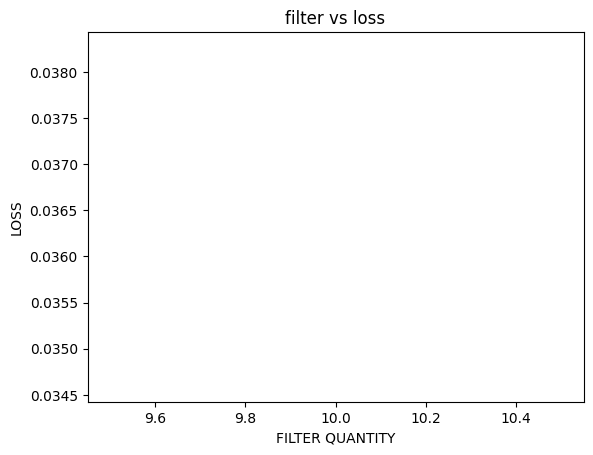

In [55]:
# plot the filter_q vs loss
import matplotlib.pyplot as plt

plt.plot(filters,[x[-1] for x in losses])

# Add labels and title
plt.xlabel('FILTER QUANTITY')
plt.ylabel('LOSS')
plt.title('filter vs loss')

# Show the plot
plt.show()


In [69]:
# we could assert that the best filter quantity for the third conv layer is == 10.
# so the best neural network was:
# Print the saved loss values
bnn_index = 0
minimal_loss = 9999
for index, loss in enumerate(losses):
  if loss[-1] < minimal_loss:
    minimal_loss = loss[-1]
    bnn_index = index

print("Best neural network in index: ", bnn_index)

bnn = neural_networks[bnn_index]
bnn.summary()

Best neural network in index:  0
Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_192 (Conv2D)         (None, 28, 28, 64)        128       
                                                                 
 max_pooling2d_192 (MaxPooli  (None, 28, 28, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_193 (Conv2D)         (None, 28, 28, 64)        4160      
                                                                 
 max_pooling2d_193 (MaxPooli  (None, 28, 28, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_194 (Conv2D)         (None, 28, 28, 10)        650       
                                                                 
 max_pooling2d_194 (

In [91]:
predictions = bnn.predict(x_test)
# 

for i, p in enumerate(predictions):
  max_pred = list(p).index(max(p))
  test_images[i].show()
  print(f"P:{max_pred} - O:{y_test[i]}")
  # limited to print out 10 predictions
  # output: P is the predicted by nn, O is the original value before prediction,
  # if P == O -> NN works well!
  if i == 10:
    break
  

313/313 [==============================] - 1s 2ms/step


P:7 - O:7


P:2 - O:2


P:1 - O:1


P:0 - O:0


P:4 - O:4


P:1 - O:1


P:4 - O:4


P:9 - O:9


P:5 - O:5


P:9 - O:9


P:0 - O:0
